In [ ]:
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/train/train.csv ./ 
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/test/test.csv ./ 

In [ ]:
#Установка catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 68 kB/s 


In [8]:
#import необходимых модулей

import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [661]:
#Считывание данных в DataFrame 

train = pd.read_csv('train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})
test = pd.read_csv('test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [622]:
#Отделение меток от данных

X = train[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']]
y = train[['PATIENT_ID_COUNT']]

In [623]:
#Разделение на train/test для локального тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

pool_train = Pool(X_train, y_train, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_test = Pool(X_test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

In [13]:
#Объявление CatBoostRegressor и обучение

model = CatBoostRegressor(task_type='GPU')
model.fit(pool_train)

Learning rate set to 0.107596
0:	learn: 56.4358156	total: 242ms	remaining: 4m 1s
1:	learn: 53.8136306	total: 484ms	remaining: 4m 1s
2:	learn: 51.5308604	total: 727ms	remaining: 4m 1s
3:	learn: 48.9953337	total: 972ms	remaining: 4m 1s
4:	learn: 47.2079582	total: 1.21s	remaining: 4m 1s
5:	learn: 45.3281734	total: 1.45s	remaining: 4m
6:	learn: 44.1712742	total: 1.69s	remaining: 4m
7:	learn: 42.7170240	total: 1.94s	remaining: 4m
8:	learn: 41.5063853	total: 2.23s	remaining: 4m 5s
9:	learn: 40.4681060	total: 2.52s	remaining: 4m 10s
10:	learn: 39.6323035	total: 2.71s	remaining: 4m 3s
11:	learn: 39.0507613	total: 2.96s	remaining: 4m 3s
12:	learn: 38.4442259	total: 3.26s	remaining: 4m 7s
13:	learn: 37.9179613	total: 3.51s	remaining: 4m 6s
14:	learn: 37.4398665	total: 3.8s	remaining: 4m 9s
15:	learn: 37.0087347	total: 4.04s	remaining: 4m 8s
16:	learn: 36.6150822	total: 4.34s	remaining: 4m 10s
17:	learn: 36.3540655	total: 4.57s	remaining: 4m 9s
18:	learn: 36.1045080	total: 4.87s	remaining: 4m 11s

In [14]:
#Получение ответов модели на тестовой выборке в локальном тестировании 

y_pred = model.predict(pool_test)

In [15]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(y_test, y_pred))

Значение метрики R2 на test:  0.8707811896812812


In [16]:
#Формируем sample_solution. В обучении используется весь train, ответы получаем на test

pool_train_solution = Pool(X, y, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_test_solution = Pool(test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

model_solution = CatBoostRegressor(task_type='GPU')
model_solution.fit(pool_train_solution)

Learning rate set to 0.110787
0:	learn: 57.0876864	total: 307ms	remaining: 5m 6s
1:	learn: 53.6689246	total: 616ms	remaining: 5m 7s
2:	learn: 50.8352000	total: 924ms	remaining: 5m 7s
3:	learn: 48.2505240	total: 1.23s	remaining: 5m 6s
4:	learn: 46.1879460	total: 1.54s	remaining: 5m 6s
5:	learn: 44.7070149	total: 1.85s	remaining: 5m 6s
6:	learn: 43.4716446	total: 2.16s	remaining: 5m 6s
7:	learn: 42.0897935	total: 2.54s	remaining: 5m 14s
8:	learn: 40.9161230	total: 2.84s	remaining: 5m 12s
9:	learn: 40.0711613	total: 3.08s	remaining: 5m 5s
10:	learn: 39.1820133	total: 3.39s	remaining: 5m 4s
11:	learn: 38.5552302	total: 3.7s	remaining: 5m 4s
12:	learn: 37.9998702	total: 4.01s	remaining: 5m 4s
13:	learn: 37.4853932	total: 4.31s	remaining: 5m 3s
14:	learn: 36.9415299	total: 4.62s	remaining: 5m 3s
15:	learn: 36.4832499	total: 5s	remaining: 5m 7s
16:	learn: 35.9823294	total: 5.28s	remaining: 5m 5s
17:	learn: 35.6725984	total: 5.66s	remaining: 5m 9s
18:	learn: 35.3867586	total: 5.97s	remaining: 

In [17]:
#Получение ответов

y_pred_solution = model.predict(pool_test_solution)

In [18]:
#Вот так они выглядят

y_pred_solution.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#Формируем sample_solution для отправки на платформу

test['PATIENT_ID_COUNT'] = y_pred_solution.astype(int)

In [20]:
#Сохраняем в csv файл
 
test.to_csv('sample_solution.csv', sep=';', index=None)

In [23]:
# Отрицательные значения
test[test['PATIENT_ID_COUNT']<0].sort_values(by='PATIENT_ID_COUNT')

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
27968,1,I11.9,Калининград,04.22,elderly,-304
7142,0,I11.9,Калининград,04.22,children,-244
38804,1,Z20.8,Калининград,04.22,middleage,-233
475,0,B82.9,Калининград,04.22,children,-225
38995,1,Z25.8,Калининград,04.22,old,-216
...,...,...,...,...,...,...
29438,1,J04.1,Зеленоградск,04.22,middleage,-1
14900,0,M51.1,Мамоново,04.22,middleage,-1
14895,0,M51.1,Калининград,04.22,centenarians,-1
29650,1,J12.8,Черняховск,04.22,middleage,-1


In [28]:
# В тестовых данных нет отрицательных значений, поэтому замена их на ноль немного улучшит метрику
test_non_negative = test.copy()
test_non_negative.loc[test_non_negative['PATIENT_ID_COUNT']<0, 'PATIENT_ID_COUNT'] = 0
test_non_negative.sort_values(by='PATIENT_ID_COUNT', ascending=True)

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,0
23633,1,C14.0,Черняховск,04.22,middleage,0
23632,1,C13.8,Неман,04.22,elderly,0
23631,1,C13.8,Калининград,04.22,young,0
23630,1,C13.8,Калининград,04.22,middleage,0
...,...,...,...,...,...,...
37921,1,Z00.0,Калининград,04.22,children,1145
29553,1,J06.9,Калининград,04.22,children,1147
29557,1,J06.9,Калининград,04.22,young,1162
22118,0,Z11.5,Калининград,04.22,young,1202


In [29]:
test_non_negative.to_csv('sample_solution_non_negative.csv', sep=';', index=None)

## Рекомендованный вариант с R2 = 0,76

In [51]:
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,0
1,0,A00,Калининград,04.22,elderly,0
2,0,A00,Калининград,04.22,middleage,0
3,0,A00,Калининград,04.22,young,1
4,0,A01,Калининград,04.22,middleage,-2
...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,0
39369,1,Z96.6,Гусев,04.22,middleage,0
39370,1,Z96.7,Гусев,04.22,young,0
39371,1,Z98.8,Озерск,04.22,children,0


In [57]:
(
    test.drop(['PATIENT_ID_COUNT'], axis=1).
    merge(
        (train[train['VISIT_MONTH_YEAR'].isin(['01.22', '02.22', '03.22'])]
        .groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)
        ['PATIENT_ID_COUNT'].mean()
        ),
        on=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
        how='left'
        )
    .fillna(1)
    .astype({'PATIENT_ID_COUNT': int})
    .to_csv('baseline_3m.csv', sep=';', index=None)
)

# При загрузке в систему выдало: 0.668303

## Данные за прошлый месяц для прогноза

In [58]:
(
    test.drop(['PATIENT_ID_COUNT'], axis=1).
    merge(
        (train[train['VISIT_MONTH_YEAR'].isin(['03.22'])]
        .groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)
        ['PATIENT_ID_COUNT'].mean()
        ),
        on=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
        how='left'
        )
    .fillna(1)
    .astype({'PATIENT_ID_COUNT': int})
    .to_csv('baseline_last_month_pred.csv', sep=';', index=None)
)

# Это оказалось лучшим из найденных решением. В системе выдало 0.947781

## Сравнение R2-метрик полученных предварительных вариантов

In [65]:
print(
    "Значение метрики R2 между средним за 3 последних месяца и исходным baseline:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        pd.read_csv('sample_solution.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True)
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и исходным baseline:
0.5854468209387187


In [66]:
print(
    "Значение метрики R2 между средним за 3 последних месяца и неотрицательным baseline:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        pd.read_csv('sample_solution_non_negative.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True)
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и неотрицательным baseline:
0.6095164214525931


In [64]:
# TODO: можно вынести в отдельную функцию, т.к. этот вызов уже использовался 3 раза.
print(
    "Значение метрики R2 между средним за 3 последних месяца и последним месяцем:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        pd.read_csv('baseline_last_month_pred.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True)
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и последним месяцем:
0.7653334236906022


## CatBoost данных после коронавирусного изменения тренда до предпоследнего месяца и проверка на последнем месяце данных

Из EDA было найдено изменение тренда общего числа регистрируемых заболеваний с уменьшения на увеличение после 06.20.
Видимо связано с появлением нового фактора - коронавируса с карантином.

Далее были предприянты попытки некоторой настройки гиперпараметров модели CatBoost с разными выборками данных. В основном выполнялась кросс-валидация данных обучения разной продолжительности с предсказанием за следующим за этой выборкой месяцем в качестве тестовой выборки.

In [ ]:
#Отделение меток от данных

X = train[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']]
y = train[['PATIENT_ID_COUNT']]

In [98]:
# Список месяцев после коронавирусного изменения тренда
after_covid_turn_month_list = [d.strftime('%m.%y') for d in pd.date_range(start='2020-06-01', end='2022-02-01', freq='MS')]
after_covid_turn_month_list

['06.20',
 '07.20',
 '08.20',
 '09.20',
 '10.20',
 '11.20',
 '12.20',
 '01.21',
 '02.21',
 '03.21',
 '04.21',
 '05.21',
 '06.21',
 '07.21',
 '08.21',
 '09.21',
 '10.21',
 '11.21',
 '12.21',
 '01.22',
 '02.22']

In [108]:
# Месяц для проверки предсказаний по модели, обученной данными списка месяцев выше.
after_covid_pred_month = '03.22'

In [109]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

pool_after_covid_train = Pool(X[X['VISIT_MONTH_YEAR'].isin(after_covid_turn_month_list)], y[X['VISIT_MONTH_YEAR'].isin(after_covid_turn_month_list)], cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_after_covid_test = Pool(X[X['VISIT_MONTH_YEAR'].isin([after_covid_pred_month])], cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

In [110]:
#Объявление CatBoostRegressor и обучение
model_after_covid = CatBoostRegressor(task_type='GPU')
model_after_covid.fit(pool_after_covid_train)

Learning rate set to 0.094654
0:	learn: 81.7912829	total: 103ms	remaining: 1m 42s
1:	learn: 78.5653978	total: 220ms	remaining: 1m 49s
2:	learn: 76.1029180	total: 319ms	remaining: 1m 46s
3:	learn: 73.7417778	total: 417ms	remaining: 1m 43s
4:	learn: 71.5084457	total: 517ms	remaining: 1m 42s
5:	learn: 70.0841921	total: 615ms	remaining: 1m 41s
6:	learn: 68.1088923	total: 734ms	remaining: 1m 44s
7:	learn: 66.4142168	total: 833ms	remaining: 1m 43s
8:	learn: 64.9367320	total: 930ms	remaining: 1m 42s
9:	learn: 63.6979962	total: 1.05s	remaining: 1m 43s
10:	learn: 62.5188473	total: 1.14s	remaining: 1m 42s
11:	learn: 61.4981186	total: 1.24s	remaining: 1m 42s
12:	learn: 60.5167563	total: 1.34s	remaining: 1m 41s
13:	learn: 59.8765745	total: 1.44s	remaining: 1m 41s
14:	learn: 59.0242617	total: 1.53s	remaining: 1m 40s
15:	learn: 58.1971197	total: 1.63s	remaining: 1m 40s
16:	learn: 57.7975546	total: 1.74s	remaining: 1m 40s
17:	learn: 57.1636774	total: 1.81s	remaining: 1m 39s
18:	learn: 56.4161772	tota

In [111]:
#Получение ответов модели на тестовой выборке в локальном тестировании 
y_after_covid_pred = model_after_covid.predict(pool_after_covid_test)

In [112]:
#На локальном тестировании модель выдаёт такой результат
print("Значение метрики модели после коронавируса R2 на test: ",
      r2_score(y[X['VISIT_MONTH_YEAR'].isin([after_covid_pred_month])],
               y_after_covid_pred))

Значение метрики модели после коронавируса R2 на test:  0.5614969480316825


In [115]:
y_after_covid_pred[y_after_covid_pred<0] = 0

In [116]:
#На локальном тестировании модель выдаёт такой результат
print("Значение метрики модели после коронавируса R2 на test: ",
      r2_score(y[X['VISIT_MONTH_YEAR'].isin([after_covid_pred_month])],
               y_after_covid_pred))

Значение метрики модели после коронавируса R2 на test:  0.5784829824028761


In [120]:
#На локальном тестировании модель выдаёт такой результат
print("Значение метрики модели после коронавируса R2 на test: ",
      r2_score(y[X['VISIT_MONTH_YEAR'].isin([after_covid_pred_month])],
               y_after_covid_pred.astype(int)))

Значение метрики модели после коронавируса R2 на test:  0.5806139997468749


In [128]:
#На локальном тестировании модель выдаёт такой результат
print("Значение метрики модели после коронавируса R2 на test: ",
      r2_score(y[X['VISIT_MONTH_YEAR'].isin([after_covid_pred_month])],
               y_after_covid_pred.astype(int)-6))

Значение метрики модели после коронавируса R2 на test:  0.5823825739911516


In [133]:
after_covid_turn_month_list[-1]

'02.22'

In [134]:
# То же самое со сдвигом на месяц
pool_after_covid_train_2 = Pool(X[X['VISIT_MONTH_YEAR'].isin(after_covid_turn_month_list[:-1])], y[X['VISIT_MONTH_YEAR'].isin(after_covid_turn_month_list[:-1])], cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_after_covid_test_2 = Pool(X[X['VISIT_MONTH_YEAR'].isin([after_covid_turn_month_list[-1]])], cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

In [135]:
model_after_covid_2 = CatBoostRegressor(task_type='GPU')
model_after_covid_2.fit(pool_after_covid_train_2)

Learning rate set to 0.094193
0:	learn: 82.5597868	total: 93.6ms	remaining: 1m 33s
1:	learn: 79.3314550	total: 187ms	remaining: 1m 33s
2:	learn: 76.2216622	total: 302ms	remaining: 1m 40s
3:	learn: 73.8818779	total: 398ms	remaining: 1m 39s
4:	learn: 71.4536381	total: 508ms	remaining: 1m 41s
5:	learn: 69.3347748	total: 621ms	remaining: 1m 42s
6:	learn: 67.1192037	total: 715ms	remaining: 1m 41s
7:	learn: 65.7162088	total: 808ms	remaining: 1m 40s
8:	learn: 63.9902031	total: 900ms	remaining: 1m 39s
9:	learn: 62.8822889	total: 978ms	remaining: 1m 36s
10:	learn: 61.8193291	total: 1.07s	remaining: 1m 36s
11:	learn: 60.6157781	total: 1.17s	remaining: 1m 36s
12:	learn: 60.0144483	total: 1.26s	remaining: 1m 35s
13:	learn: 59.2118880	total: 1.36s	remaining: 1m 35s
14:	learn: 58.3604313	total: 1.43s	remaining: 1m 34s
15:	learn: 57.6276563	total: 1.55s	remaining: 1m 35s
16:	learn: 56.8487499	total: 1.64s	remaining: 1m 34s
17:	learn: 56.3199506	total: 1.76s	remaining: 1m 35s
18:	learn: 55.7242014	tot

In [136]:
#Получение ответов модели на тестовой выборке в локальном тестировании 
y_after_covid_pred_2 = model_after_covid_2.predict(pool_after_covid_test_2)

In [138]:
#На локальном тестировании модель выдаёт такой результат
print("Значение метрики модели после коронавируса -1 месяц с конца R2 на test: ",
      r2_score(y[X['VISIT_MONTH_YEAR'].isin([after_covid_turn_month_list[-1]])],
               y_after_covid_pred_2.astype(int)))

Значение метрики модели после коронавируса -1 месяц с конца R2 на test:  0.5201524409386087


## Обобщение в цикле попыток CatBoost для после коронавирусного тренда

In [185]:
# Список месяцев после коронавирусного изменения тренда
after_covid_turn_month_list = [d.strftime('%m.%y') for d in pd.date_range(start='2020-06-01', end='2022-03-01', freq='MS')]
after_covid_turn_month_list

['06.20',
 '07.20',
 '08.20',
 '09.20',
 '10.20',
 '11.20',
 '12.20',
 '01.21',
 '02.21',
 '03.21',
 '04.21',
 '05.21',
 '06.21',
 '07.21',
 '08.21',
 '09.21',
 '10.21',
 '11.21',
 '12.21',
 '01.22',
 '02.22',
 '03.22']

In [230]:
"""
Обучается на последовательности месяцев.
Выдаёт предсказание по следуюущему за этой последовательностью месяцу
"""
def CatBoost_by_subsets(X, y, train_month_list, test_month, prefix_file_name='sample_subset_solution'):
    pool_month_subset_train = Pool(
        X[X['VISIT_MONTH_YEAR'].isin(train_month_list)],
        y[X['VISIT_MONTH_YEAR'].isin(train_month_list)],
        cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']
    )
    pool_month_test = Pool(
        X[X['VISIT_MONTH_YEAR'].isin([test_month])],
        cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']
    )
    
    #Объявление CatBoostRegressor и обучение
    model = CatBoostRegressor(task_type='GPU')
    model.fit(pool_month_subset_train)

    #Получение ответов модели на тестовой выборке в локальном тестировании 
    y_pred = model.predict(pool_month_test)

    r2_test_month = r2_score(y[X['VISIT_MONTH_YEAR'].isin([test_month])],
                             y_pred.astype(int))
        
    print("Значение метрики модели после коронавируса R2 на test: ", r2_test_month)
    
    #Формируем sample_solution для отправки на платформу
    # NOTE: здесь была ошибка y_pred_solution -> вместо y_pred. В файлах так будет записано
    test['PATIENT_ID_COUNT'] = y_pred.astype(int)
    
    #Сохраняем в csv файл
    test.to_csv(prefix_file_name + '.' + test_month + '.csv', sep=';', index=None)
    
    # NOTE: Замена отрицательных значений на 0 или среднее по категории улучшает результат
    
    return r2_test_month

In [195]:
r2_score_subsets_by_month = {}
for month_num in range(7, 23):
    train_month_list = after_covid_turn_month_list[:month_num]
    test_month = after_covid_turn_month_list[month_num-1]
    
    r2_score_subsets_by_month[test_month] = CatBoost_by_subsets(X, y, train_month_list, test_month)
    print(r2_score_subsets_by_month[test_month])



Learning rate set to 0.082066
0:	learn: 55.1579523	total: 33.6ms	remaining: 33.6s
1:	learn: 53.3179193	total: 66.7ms	remaining: 33.3s
2:	learn: 51.7083511	total: 102ms	remaining: 33.8s
3:	learn: 50.4529966	total: 137ms	remaining: 34s
4:	learn: 49.1354049	total: 171ms	remaining: 34s
5:	learn: 47.8458553	total: 211ms	remaining: 34.9s
6:	learn: 46.8517281	total: 246ms	remaining: 34.8s
7:	learn: 45.8124872	total: 285ms	remaining: 35.3s
8:	learn: 44.9697475	total: 318ms	remaining: 35.1s
9:	learn: 44.1970606	total: 363ms	remaining: 36s
10:	learn: 43.6228784	total: 395ms	remaining: 35.5s
11:	learn: 42.9090265	total: 436ms	remaining: 35.9s
12:	learn: 42.3803125	total: 475ms	remaining: 36.1s
13:	learn: 42.0248815	total: 515ms	remaining: 36.3s
14:	learn: 41.5626876	total: 550ms	remaining: 36.1s
15:	learn: 41.1366346	total: 592ms	remaining: 36.4s
16:	learn: 40.8562401	total: 631ms	remaining: 36.5s
17:	learn: 40.5636534	total: 681ms	remaining: 37.2s
18:	learn: 40.1724575	total: 728ms	remaining: 37

In [226]:
pd.DataFrame.from_dict(
    r2_score_subsets_by_month, orient="index", columns=['R2 Score']
).to_csv(
    'r2_score_subsets_by_months.csv', sep=';', index_label='VISIT_MONTH_YEAR.PRED'
)
print(r2_score_subsets_by_month)

{'12.20': 0.7637990259631965, '01.21': 0.8356416220955682, '02.21': 0.8808007011089735, '03.21': 0.8559182771094319, '04.21': 0.8884814342987191, '05.21': 0.9120129198469118, '06.21': 0.8995646848161839, '07.21': 0.8990277650108571, '08.21': 0.8747438520652457, '09.21': 0.832586790286534, '10.21': 0.9407148848022883, '11.21': 0.962817400622386, '12.21': 0.8851189557017706, '01.22': 0.9013626445774092, '02.22': 0.8797120200941131, '03.22': 0.71911728761901}


In [197]:
import matplotlib.pyplot as plt

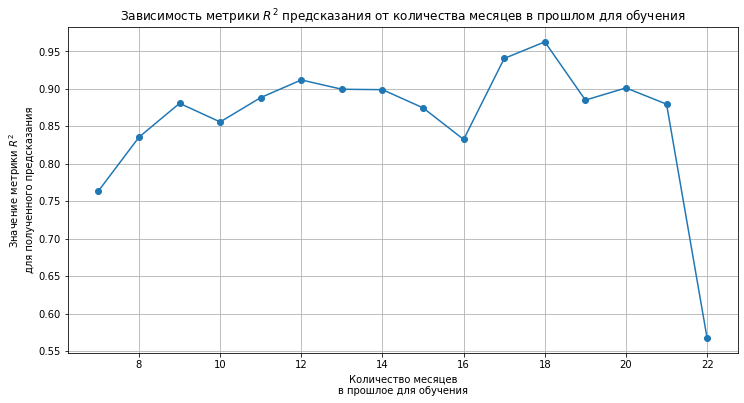

In [246]:
plt.figure(figsize=(12, 6))
plt.plot(range(7, 23), r2_score_subsets_by_month.values(), marker='o')
plt.title('Зависимость метрики $R^2$ предсказания от количества месяцев в прошлом для обучения')
plt.xlabel(r'Количество месяцев' + '\n' + 'в прошлое для обучения')
plt.ylabel(r'Значение метрики $R^2$' + '\n' + 'для полученного предсказания')
plt.grid()
plt.show()

# Хорошо видны пики локальных максимумов на 12 и 18 месяцев (1 и 1,5 года)

## Подбираем период обучения для предсказания последнего месяца

In [240]:
r2_score_subsets_for_final_month = []
# Теперь ищем только для последнего месяца
test_month = after_covid_turn_month_list[-1]

for month_num in range(2, 23):
    train_month_list = after_covid_turn_month_list[-1-month_num:-1]
    
    r2_score_subsets_for_final_month.append(
        CatBoost_by_subsets(X, y, train_month_list, 
                            test_month, 'for_final_month.subsets_' + str(month_num)
                           )
    )

Learning rate set to 0.06745
0:	learn: 65.1744347	total: 21.6ms	remaining: 21.6s
1:	learn: 63.6467864	total: 45.3ms	remaining: 22.6s
2:	learn: 62.1693112	total: 65.8ms	remaining: 21.9s
3:	learn: 60.6895225	total: 85.2ms	remaining: 21.2s
4:	learn: 59.2220621	total: 110ms	remaining: 21.9s
5:	learn: 57.6897340	total: 132ms	remaining: 21.8s
6:	learn: 56.5239311	total: 155ms	remaining: 22s
7:	learn: 55.4331893	total: 176ms	remaining: 21.9s
8:	learn: 54.4999896	total: 196ms	remaining: 21.6s
9:	learn: 53.3208606	total: 215ms	remaining: 21.3s
10:	learn: 52.4229958	total: 239ms	remaining: 21.5s
11:	learn: 51.4940131	total: 261ms	remaining: 21.5s
12:	learn: 50.8436643	total: 285ms	remaining: 21.6s
13:	learn: 50.0715393	total: 303ms	remaining: 21.4s
14:	learn: 49.3185634	total: 326ms	remaining: 21.4s
15:	learn: 48.6203483	total: 348ms	remaining: 21.4s
16:	learn: 47.9670237	total: 371ms	remaining: 21.5s
17:	learn: 47.5103407	total: 391ms	remaining: 21.4s
18:	learn: 46.7112208	total: 412ms	remainin

In [241]:
print(r2_score_subsets_for_final_month)

[0.31294050862388223, 0.3793321240166825, 0.015462842048301617, 0.21290920389815227, 0.3319578706028721, 0.267236748714323, 0.23759416353281315, 0.3346714123702107, 0.5138272956972552, 0.3573334678426944, 0.008551226396941725, 0.24053324913615903, 0.47107278342347747, 0.5652503134323706, 0.5911315510776325, 0.5228086293680803, 0.4884869928072907, 0.6013728752770262, 0.3575412249502685, 0.5067368485737185, 0.6419123943335594]


In [254]:
pd.DataFrame(
    r2_score_subsets_for_final_month, columns=['R2 Score']
).to_csv(
    'r2_score_subsets_for_final_month.csv', sep=';', index_label='VISIT_MONTH_YEAR_SHIFT_FROM_2'
)
print(r2_score_subsets_for_final_month)

[0.31294050862388223, 0.3793321240166825, 0.015462842048301617, 0.21290920389815227, 0.3319578706028721, 0.267236748714323, 0.23759416353281315, 0.3346714123702107, 0.5138272956972552, 0.3573334678426944, 0.008551226396941725, 0.24053324913615903, 0.47107278342347747, 0.5652503134323706, 0.5911315510776325, 0.5228086293680803, 0.4884869928072907, 0.6013728752770262, 0.3575412249502685, 0.5067368485737185, 0.6419123943335594]


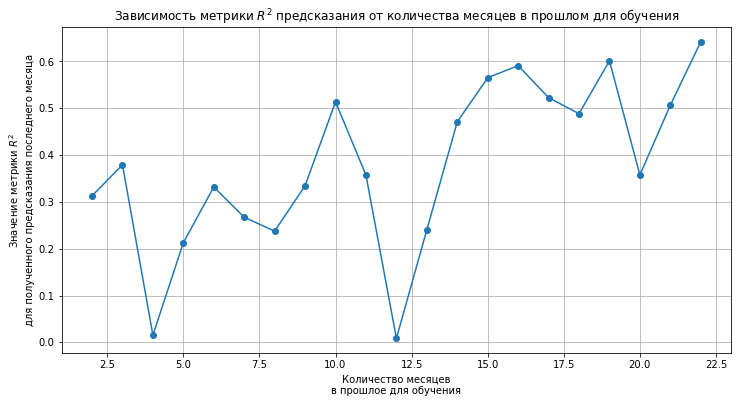

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 23), r2_score_subsets_for_final_month, marker='o')
plt.title('Зависимость метрики $R^2$ предсказания от количества месяцев в прошлом для обучения')
plt.xlabel(r'Количество месяцев' + '\n' + 'в прошлое для обучения')
plt.ylabel(r'Значение метрики $R^2$' + '\n' + 'для полученного предсказания последнего месяца')
plt.grid()
plt.show()


## По двум прошлым проходам обучение на 18 месяцев назад дало наибольшую точность. Сделаем такое предсказание.

In [265]:
months_18_list = after_covid_turn_month_list[-18:]

In [264]:
#test.drop(['PATIENT_ID_COUNT'], axis=1)
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,0,A00,Калининград,04.22,children
1,0,A00,Калининград,04.22,elderly
2,0,A00,Калининград,04.22,middleage
3,0,A00,Калининград,04.22,young
4,0,A01,Калининград,04.22,middleage
...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly
39369,1,Z96.6,Гусев,04.22,middleage
39370,1,Z96.7,Гусев,04.22,young
39371,1,Z98.8,Озерск,04.22,children


In [266]:
X

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,0,A00.0,Гурьевск,08.21,young
1,0,A00.0,Калининград,03.20,children
2,0,A00,Гусев,03.19,children
3,0,A00,Калининград,01.22,children
4,0,A00,Калининград,02.18,children
...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children
2212389,1,Z99.8,Калининград,10.21,young
2212390,1,Z99.9,Калининград,04.19,children
2212391,1,Z99.9,Калининград,08.19,children


In [267]:
y

,PATIENT_ID_COUNT
0,1
1,1
2,1
3,1
4,1
...,...
2212388,1
2212389,1
2212390,2
2212391,1


In [269]:
pool_18_months_train = Pool(
    X[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    y[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']
)

pool_18_months_test = Pool(
    #test.drop(['PATIENT_ID_COUNT'], axis=1),
    test,
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']
)

#Объявление CatBoostRegressor и обучение
model = CatBoostRegressor(task_type='GPU')
model.fit(pool_18_months_train)

#Получение ответов модели на тестовой выборке в локальном тестировании 
y_pred = model.predict(pool_18_months_test)

# Оценим точность по baseline среднего за 3 последних месяца
print(
    "Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        y_pred.astype(int)
    ),
    sep='\n'
)
    
#Формируем sample_solution для отправки на платформу
test['PATIENT_ID_COUNT'] = y_pred.astype(int)
    
#Сохраняем в csv файл
test.to_csv('out.by_18_last_months.csv', sep=';', index=None)

Learning rate set to 0.092788
0:	learn: 86.5053499	total: 70.5ms	remaining: 1m 10s
1:	learn: 83.4476892	total: 137ms	remaining: 1m 8s
2:	learn: 80.4802328	total: 238ms	remaining: 1m 19s
3:	learn: 77.7815707	total: 308ms	remaining: 1m 16s
4:	learn: 75.3440633	total: 393ms	remaining: 1m 18s
5:	learn: 73.0615913	total: 496ms	remaining: 1m 22s
6:	learn: 71.3362357	total: 584ms	remaining: 1m 22s
7:	learn: 69.8761483	total: 670ms	remaining: 1m 23s
8:	learn: 68.5032009	total: 739ms	remaining: 1m 21s
9:	learn: 66.9062602	total: 826ms	remaining: 1m 21s
10:	learn: 65.8744508	total: 897ms	remaining: 1m 20s
11:	learn: 64.9077464	total: 978ms	remaining: 1m 20s
12:	learn: 64.0292944	total: 1.06s	remaining: 1m 20s
13:	learn: 62.8697521	total: 1.17s	remaining: 1m 22s
14:	learn: 61.9009795	total: 1.25s	remaining: 1m 22s
15:	learn: 61.2261645	total: 1.35s	remaining: 1m 23s
16:	learn: 60.5219351	total: 1.44s	remaining: 1m 23s
17:	learn: 59.9578493	total: 1.52s	remaining: 1m 23s
18:	learn: 59.4335060	tota

In [274]:
# Отрицательные значения заменяем на 0
# NOTE: может быть 1 или среднее значение в категории?
test.loc[test.PATIENT_ID_COUNT<0, 'PATIENT_ID_COUNT'] = 0

In [276]:
test.loc[test.PATIENT_ID_COUNT<0]

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT


In [277]:
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,6
1,0,A00,Калининград,04.22,elderly,0
2,0,A00,Калининград,04.22,middleage,5
3,0,A00,Калининград,04.22,young,3
4,0,A01,Калининград,04.22,middleage,4
...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,0
39369,1,Z96.6,Гусев,04.22,middleage,5
39370,1,Z96.7,Гусев,04.22,young,7
39371,1,Z98.8,Озерск,04.22,children,8


In [283]:
print(
    "Значение метрики R2 между средним за 3 последних месяца и неотрицательным предсказанием CatBoost по 18 месяцам:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        test['PATIENT_ID_COUNT']
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и неотрицательным предсказанием CatBoost по 18 месяцам:
0.7397533312513961


In [278]:
test.to_csv('out.by_18_last_months.non_negative.csv', sep=';', index=None)
# В системе выдало оценку 0.588817

# Попытки дальнейшего обучения CatBoost с присоединёнными данными либо с расшифрованными исходными категориями.

In [284]:
# TODO: Попробовать присоединить население по городам вместо названий (возможно в процентах от всего населения области)
# TODO: Может быть категории возрастов заменить на числовые диапазоны или перевести в долю от всего населения области
# TODO: Попробовать присоединить температуру (мин., макс., средн.) по месяцам

In [293]:
test.ADRES.unique()

array(['Калининград', 'Гурьевск', 'Черняховск', 'Балтийск',
       'Багратионовск', 'Пионерский', 'Гвардейск', 'Зеленоградск',
       'Нестеров', 'Правдинск', 'Славск', 'Советск', 'Полесск', 'Светлый',
       'Гусев', 'Озерск', 'Краснознаменск', 'Мамоново', 'Неман',
       'Светлогорск'], dtype=object)

In [ ]:
# @link https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D0%B5_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D1%91%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D1%8B_%D0%9A%D0%B0%D0%BB%D0%B8%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8
# Население основных городов Калининградской области
# Остальным можно поставить среднее население по остатку
# @link https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%B0%D0%BB%D0%B8%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8
# 1027678 чел. - Население области на 2022 год

In [445]:
main_cities_url_wiki = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D0%B5_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D1%91%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D1%8B_%D0%9A%D0%B0%D0%BB%D0%B8%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8'
kal_reg_pop_url_wiki = 'https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%B0%D0%BB%D0%B8%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8'

# Web Scraping
main_cities_table = pd.read_html(main_cities_url_wiki, attrs={'class': 'standard sortable'})
kal_reg_pop_table = pd.read_html(kal_reg_pop_url_wiki, attrs={'class': 'standard'})

In [446]:
main_cities_table

[     №        название  годоснования прежние названия  площадь (км²)  \
 0    1   Багратионовск          1336    Прёйсиш-Эйлау              8   
 1    2        Балтийск          1626           Пиллау             49   
 2    3       Гвардейск          1255           Тапиау             12   
 3    4        Гурьевск          1262        Нойхаузен             10   
 4    5           Гусев          1722        Гумбиннен             16   
 5    6    Зеленоградск          1252            Кранц             17   
 6    7     Калининград          1255       Кёнигсберг            225   
 7    8  Краснознаменск          1576         Лазденен              8   
 8    9        Ладушкин          1314       Людвигсорт              5   
 9   10        Мамоново          1301    Хайлигенбайль             20   
 10  11           Неман          1277           Рагнит             14   
 11  12        Нестеров          1539      Шталлупёнен              8   
 12  13          Озёрск          1724         Дарке

In [447]:
type(main_cities_table)

list

In [448]:
type(kal_reg_pop_table)

list

In [449]:
main_cities_table[0].iloc[:, 5] = main_cities_table[0].iloc[:, 5].apply(
    lambda x: ''.join(ch for ch in x[1:-3] if ch.isalnum())
)

In [450]:
main_cities_table[0]

,№,название,годоснования,прежние названия,площадь (км²),население(чел.),район / город областного значения[6],городской/муниципальный округ[7]
0,1,Багратионовск,1336,Прёйсиш-Эйлау,8,6401,Багратионовский район,Багратионовский муниципальный округ
1,2,Балтийск,1626,Пиллау,49,33946,Балтийск,Балтийский городской округ
2,3,Гвардейск,1255,Тапиау,12,13353,Гвардейский район,Гвардейский муниципальный округ
3,4,Гурьевск,1262,Нойхаузен,10,19670,Гурьевский район,Гурьевский муниципальный округ
4,5,Гусев,1722,Гумбиннен,16,28177,Гусевский район,Гусевский городской округ
5,6,Зеленоградск,1252,Кранц,17,17296,Зеленоградский район,Зеленоградский муниципальный округ
6,7,Калининград,1255,Кёнигсберг,225,498260,Калининград,"город Калининград, городской округ"
7,8,Краснознаменск,1576,Лазденен,8,3049,Краснознаменский район,Краснознаменский муниципальный округ
8,9,Ладушкин,1314,Людвигсорт,5,3820,Ладушкин,Ладушкинский городской округ
9,10,Мамоново,1301,Хайлигенбайль,20,8104,Мамоново,Мамоновский городской округ


In [451]:
main_cities_table[1].iloc[:, 5] = main_cities_table[1].iloc[:, 5].apply(
    lambda x: ''.join(ch for ch in x[1:-3] if ch.isalnum())
)

In [452]:
main_cities_table[1]

,№,название,статуспгт,прежние названия,площадь (км²),население(чел.),город/пгт областного значения[6],городской округ[7]
0,1,Янтарный,1947,Пальмникен,NaN,5627,Янтарный,Янтарный городской округ


In [453]:
dict_pop = dict(zip(list(main_cities_table[0].iloc[:, 1]), list(main_cities_table[0].iloc[:, 5].astype(int))))

In [454]:
dict_pop_2 = dict(zip(list(main_cities_table[1].iloc[:, 1]), list(main_cities_table[1].iloc[:, 5].astype(int))))

In [455]:
dict_pop.update(dict_pop_2)

In [405]:
# Convert to int
dict_pop.update((key, int(val)) for key, val in dict_pop.items())
# Already done above in astype(int)

In [456]:
main_cities_total_pop = sum(dict_pop.values())

In [457]:
dict_pop

{'Багратионовск': 6401,
 'Балтийск': 33946,
 'Гвардейск': 13353,
 'Гурьевск': 19670,
 'Гусев': 28177,
 'Зеленоградск': 17296,
 'Калининград': 498260,
 'Краснознаменск': 3049,
 'Ладушкин': 3820,
 'Мамоново': 8104,
 'Неман': 10765,
 'Нестеров': 3937,
 'Озёрск': 3816,
 'Пионерский': 12573,
 'Полесск': 6921,
 'Правдинск': 4045,
 'Приморск': 1921,
 'Светлогорск': 16099,
 'Светлый': 21441,
 'Славск': 3964,
 'Советск': 38514,
 'Черняховск': 35375,
 'Янтарный': 5627}

In [458]:
"""
По названию города Калиниградской области выдаёт его население.
Для самых больших городов население прописано в hard code - словаре.
Для отсутствующих берётся среднее население по остатку.
"""
def get_pop_by_city(city_name, dict_pop, region_pop=1027678, num_remain_city=95):
    if city_name in dict_pop:
        city_pop = dict_pop[city_name]
    else:
        main_cities_total_pop = sum(dict_pop.values())
        city_pop = round((region_pop - main_cities_total_pop) / num_remain_city)
    return city_pop

In [459]:
for city in train.ADRES.unique():
    print(city, get_pop_by_city(city, dict_pop), sep=': ')

Гурьевск: 19670
Калининград: 498260
Гусев: 28177
Нестеров: 3937
Партизанское: 2427
Садовое: 2427
Славск: 3964
Ясная Поляна: 2427
Гвардейск: 13353
Холмогоровка: 2427
Багратионовск: 6401
Большое Исаково: 2427
Зеленоградск: 17296
Калининградская: 2427
Колосовка: 2427
Краснознаменск: 3049
Невское: 2427
Неман: 10765
Пионерский: 12573
Правдинск: 4045
Прибрежный: 2427
СТ Железнодорожник: 2427
СТ Искра ул. Тюльпановая: 2427
СТ Победа: 2427
Светлый: 21441
Советск: 38514
Совхозное: 2427
Черняховск: 35375
Балтийск: 33946
Малое Васильково: 2427
Полесск: 6921
Сосновка: 2427
Ладушкин: 3820
Малинники: 2427
Раздольное: 2427
Озерск: 2427
Волочаевское: 2427
Мамоново: 8104
Нивенское: 2427
Светлогорск: 16099
Васильково: 2427
Голубево: 2427
Долгоруково: 2427
Донское: 2427
Дружный: 2427
Заозерье: 2427
Корнево: 2427
Ласкино: 2427
Луговое: 2427
Люблино: 2427
Малиновка: 2427
Малое Исаково: 2427
Матросово: 2427
Озерки: 2427
Переславское: 2427
Пятидорожное: 2427
СТ Колосок: 2427
СТ Радуга: 2427
Саранское: 2427
С

In [461]:
(1027678-sum(dict_pop.values()))/95

2427.4105263157894

In [ ]:
# Присоединяем столбец данных с населением

In [464]:
train['POPULATION'] = train['ADRES'].apply(lambda city_name: get_pop_by_city(city_name, dict_pop))

In [466]:
train

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,POPULATION
0,0,A00.0,Гурьевск,08.21,young,1,19670
1,0,A00.0,Калининград,03.20,children,1,498260
2,0,A00,Гусев,03.19,children,1,28177
3,0,A00,Калининград,01.22,children,1,498260
4,0,A00,Калининград,02.18,children,1,498260
...,...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,1,19670
2212389,1,Z99.8,Калининград,10.21,young,1,498260
2212390,1,Z99.9,Калининград,04.19,children,2,498260
2212391,1,Z99.9,Калининград,08.19,children,1,498260


In [471]:
X['POPULATION'] = X.loc[:, 'ADRES'].apply(lambda city_name: get_pop_by_city(city_name, dict_pop))

E:\tmp/ipykernel_3256/3977562039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['POPULATION'] = X.loc[:, 'ADRES'].apply(lambda city_name: get_pop_by_city(city_name, dict_pop))


In [472]:
X

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,POPULATION
0,0,A00.0,Гурьевск,08.21,young,19670
1,0,A00.0,Калининград,03.20,children,498260
2,0,A00,Гусев,03.19,children,28177
3,0,A00,Калининград,01.22,children,498260
4,0,A00,Калининград,02.18,children,498260
...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,19670
2212389,1,Z99.8,Калининград,10.21,young,498260
2212390,1,Z99.9,Калининград,04.19,children,498260
2212391,1,Z99.9,Калининград,08.19,children,498260


## Повторяем для данных с присоединенным населением

In [549]:
pool_18_months_train = Pool(
    X[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    y[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY', 'POPULATION']
)

test['POPULATION'] = test.loc[:, 'ADRES'].apply(lambda city_name: get_pop_by_city(city_name, dict_pop))

pool_18_months_test = Pool(
    test.drop(['PATIENT_ID_COUNT'], axis=1),
    #test,
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY', 'POPULATION']
)

In [550]:
#Объявление CatBoostRegressor и обучение
model = CatBoostRegressor(task_type='GPU')
model.fit(pool_18_months_train)

#Получение ответов модели на тестовой выборке в локальном тестировании 
y_pred = model.predict(pool_18_months_test)

# Оценим точность по baseline среднего за 3 последних месяца
print(
    "Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        y_pred.astype(int)
    ),
    sep='\n'
)
    
#Формируем sample_solution для отправки на платформу
test['PATIENT_ID_COUNT'] = y_pred.astype(int)
    
#Сохраняем в csv файл
test.to_csv('out.by_18_last_months.with_popualtion.csv', sep=';', index=None)

Learning rate set to 0.092788
0:	learn: 86.4999444	total: 86.8ms	remaining: 1m 26s
1:	learn: 83.4648141	total: 164ms	remaining: 1m 21s
2:	learn: 80.6583187	total: 278ms	remaining: 1m 32s
3:	learn: 77.8767122	total: 356ms	remaining: 1m 28s
4:	learn: 75.4196804	total: 451ms	remaining: 1m 29s
5:	learn: 73.4346398	total: 545ms	remaining: 1m 30s
6:	learn: 71.2713376	total: 657ms	remaining: 1m 33s
7:	learn: 69.7738883	total: 752ms	remaining: 1m 33s
8:	learn: 68.3836755	total: 833ms	remaining: 1m 31s
9:	learn: 66.7530872	total: 928ms	remaining: 1m 31s
10:	learn: 65.6130519	total: 1s	remaining: 1m 30s
11:	learn: 64.6252812	total: 1.1s	remaining: 1m 30s
12:	learn: 63.5815870	total: 1.2s	remaining: 1m 31s
13:	learn: 62.6973377	total: 1.31s	remaining: 1m 32s
14:	learn: 61.6638550	total: 1.41s	remaining: 1m 32s
15:	learn: 60.9897706	total: 1.52s	remaining: 1m 33s
16:	learn: 60.5157056	total: 1.62s	remaining: 1m 33s
17:	learn: 59.9775890	total: 1.73s	remaining: 1m 34s
18:	learn: 59.4876864	total: 1

In [552]:
test.iloc[:, :6]

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,5
1,0,A00,Калининград,04.22,elderly,2
2,0,A00,Калининград,04.22,middleage,4
3,0,A00,Калининград,04.22,young,7
4,0,A01,Калининград,04.22,middleage,3
...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,2
39369,1,Z96.6,Гусев,04.22,middleage,3
39370,1,Z96.7,Гусев,04.22,young,5
39371,1,Z98.8,Озерск,04.22,children,6


In [553]:
# Отрицательные значения заменяем на 0
# NOTE: может быть 1 или среднее значение в категории?
test.loc[test.PATIENT_ID_COUNT<0, 'PATIENT_ID_COUNT'] = 0

In [554]:
(test['PATIENT_ID_COUNT']<0).any()

False

In [555]:
# Оценим точность по baseline среднего за 3 последних месяца
print(
    "Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население, неотрицательные:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        test['PATIENT_ID_COUNT']
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население, неотрицательные:
0.7830565410407723


In [556]:
#Сохраняем в csv файл
test.iloc[:, :6].to_csv('out.by_18_last_months.with_popualtion.non_negative.csv', sep=';', index=None)
# В системе выдало точность всего 0.482687. Наименьшее для всех загруженных решений

In [488]:
# Добавление температуры в Калининграде по месяцам

In [489]:
!pip install meteostat

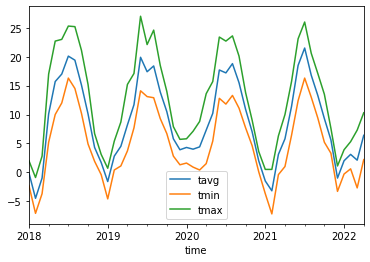

In [500]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Monthly

# Time period
start = datetime(2018, 1, 15)
end = datetime(2022, 4, 15)

#data = Monthly('10637', start, end) # Это из премера для Ванкувера.
# Нам нужен Калининград. Берём его значения температуры для всей области. Скорее всего неплохое приближение.
# Kaliningrad weather station id 26702
# latitude: 54.7167
# longitude: 20.55
data = Monthly('26702', start, end)
data = data.fetch()

# Graph with average, minimum and maximum temperatures
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [501]:
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2018-01-01,-0.1,-2.3,2.0,79.4,13.0,NaN,NaN
2018-02-01,-4.5,-7.1,-0.9,22.1,NaN,NaN,NaN
2018-03-01,-1.0,-3.7,2.8,20.6,NaN,NaN,NaN
2018-04-01,10.1,5.2,17.0,43.7,NaN,NaN,NaN
2018-05-01,15.7,10.0,22.7,35.5,10.5,NaN,NaN
2018-06-01,17.0,12.0,23.0,34.4,NaN,NaN,NaN
2018-07-01,20.1,16.3,25.3,94.2,NaN,1012.7,NaN
2018-08-01,19.4,14.5,25.2,65.9,10.0,1015.7,NaN
2018-09-01,15.1,10.2,21.1,40.0,10.0,1017.8,NaN


In [502]:
data.tavg.astype(int)

time
2018-01-01     0
2018-02-01    -4
2018-03-01    -1
2018-04-01    10
2018-05-01    15
2018-06-01    17
2018-07-01    20
2018-08-01    19
2018-09-01    15
2018-10-01    10
2018-11-01     4
2018-12-01     1
2019-01-01    -1
2019-02-01     2
2019-03-01     4
2019-04-01     8
2019-05-01    11
2019-06-01    19
2019-07-01    17
2019-08-01    18
2019-09-01    13
2019-10-01    10
2019-11-01     5
2019-12-01     3
2020-01-01     4
2020-02-01     4
2020-03-01     4
2020-04-01     7
2020-05-01    10
2020-06-01    17
2020-07-01    17
2020-08-01    18
2020-09-01    15
2020-10-01    10
2020-11-01     7
2020-12-01     2
2021-01-01    -1
2021-02-01    -3
2021-03-01     3
2021-04-01     5
2021-05-01    11
2021-06-01    18
2021-07-01    21
2021-08-01    16
2021-09-01    13
2021-10-01     9
2021-11-01     5
2021-12-01    -1
2022-01-01     2
2022-02-01     3
2022-03-01     2
2022-04-01     6
Name: tavg, dtype: int32

In [508]:
data.index.strftime('%m.%y')

Index(['01.18', '02.18', '03.18', '04.18', '05.18', '06.18', '07.18', '08.18',
       '09.18', '10.18', '11.18', '12.18', '01.19', '02.19', '03.19', '04.19',
       '05.19', '06.19', '07.19', '08.19', '09.19', '10.19', '11.19', '12.19',
       '01.20', '02.20', '03.20', '04.20', '05.20', '06.20', '07.20', '08.20',
       '09.20', '10.20', '11.20', '12.20', '01.21', '02.21', '03.21', '04.21',
       '05.21', '06.21', '07.21', '08.21', '09.21', '10.21', '11.21', '12.21',
       '01.22', '02.22', '03.22', '04.22'],
      dtype='object', name='time')

In [514]:
t_avg_kaliningrad = dict(zip(data.index.strftime('%m.%y'), data.tavg.astype(int)))

In [516]:
# Калининград, средняя температура по месяцам
t_avg_kaliningrad

{'01.18': 0,
 '02.18': -4,
 '03.18': -1,
 '04.18': 10,
 '05.18': 15,
 '06.18': 17,
 '07.18': 20,
 '08.18': 19,
 '09.18': 15,
 '10.18': 10,
 '11.18': 4,
 '12.18': 1,
 '01.19': -1,
 '02.19': 2,
 '03.19': 4,
 '04.19': 8,
 '05.19': 11,
 '06.19': 19,
 '07.19': 17,
 '08.19': 18,
 '09.19': 13,
 '10.19': 10,
 '11.19': 5,
 '12.19': 3,
 '01.20': 4,
 '02.20': 4,
 '03.20': 4,
 '04.20': 7,
 '05.20': 10,
 '06.20': 17,
 '07.20': 17,
 '08.20': 18,
 '09.20': 15,
 '10.20': 10,
 '11.20': 7,
 '12.20': 2,
 '01.21': -1,
 '02.21': -3,
 '03.21': 3,
 '04.21': 5,
 '05.21': 11,
 '06.21': 18,
 '07.21': 21,
 '08.21': 16,
 '09.21': 13,
 '10.21': 9,
 '11.21': 5,
 '12.21': -1,
 '01.22': 2,
 '02.22': 3,
 '03.22': 2,
 '04.22': 6}

In [526]:
# Присоединяем данные по температуре
train['TEMP_AVG'] = train['VISIT_MONTH_YEAR'].apply(lambda month_year: t_avg_kaliningrad[month_year])
test['TEMP_AVG'] = test['VISIT_MONTH_YEAR'].apply(lambda month_year: t_avg_kaliningrad[month_year])

In [530]:
# Присоединяем данные по температуре
X['TEMP_AVG'] = X['VISIT_MONTH_YEAR'].apply(lambda month_year: t_avg_kaliningrad[month_year])
X['TEMP_AVG'] = X['VISIT_MONTH_YEAR'].apply(lambda month_year: t_avg_kaliningrad[month_year])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [557]:
train

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,POPULATION,TEMP_AVG
0,0,A00.0,Гурьевск,08.21,young,1,19670,16
1,0,A00.0,Калининград,03.20,children,1,498260,4
2,0,A00,Гусев,03.19,children,1,28177,4
3,0,A00,Калининград,01.22,children,1,498260,2
4,0,A00,Калининград,02.18,children,1,498260,-4
...,...,...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,1,19670,-1
2212389,1,Z99.8,Калининград,10.21,young,1,498260,9
2212390,1,Z99.9,Калининград,04.19,children,2,498260,8
2212391,1,Z99.9,Калининград,08.19,children,1,498260,18


In [558]:
X

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,POPULATION,TEMP_AVG
0,0,A00.0,Гурьевск,08.21,young,19670,16
1,0,A00.0,Калининград,03.20,children,498260,4
2,0,A00,Гусев,03.19,children,28177,4
3,0,A00,Калининград,01.22,children,498260,2
4,0,A00,Калининград,02.18,children,498260,-4
...,...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,19670,-1
2212389,1,Z99.8,Калининград,10.21,young,498260,9
2212390,1,Z99.9,Калининград,04.19,children,498260,8
2212391,1,Z99.9,Калининград,08.19,children,498260,18


## Повторяем для данных с присоединенной средней температурой

In [565]:
pool_18_months_train = Pool(
    X[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    y[X['VISIT_MONTH_YEAR'].isin(months_18_list)],
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY', 'POPULATION', 'TEMP_AVG']
)

pool_18_months_test = Pool(
    test.drop(['PATIENT_ID_COUNT'], axis=1),
    #test,
    cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY', 'POPULATION', 'TEMP_AVG']
)

#Объявление CatBoostRegressor и обучение
model = CatBoostRegressor(task_type='GPU')
model.fit(pool_18_months_train)

#Получение ответов модели на тестовой выборке в локальном тестировании 
y_pred = model.predict(pool_18_months_test)

# Оценим точность по baseline среднего за 3 последних месяца
print(
    "Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население + средняя температура:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        y_pred.astype(int)
    ),
    sep='\n'
)
    
#Формируем sample_solution для отправки на платформу
test['PATIENT_ID_COUNT'] = y_pred.astype(int)
    
#Сохраняем в csv файл
test.to_csv('out.by_18_last_months.with_popualtion.non_negative.csv', sep=';', index=None)

Learning rate set to 0.092788
0:	learn: 86.4999444	total: 87.8ms	remaining: 1m 27s
1:	learn: 83.4648141	total: 178ms	remaining: 1m 28s
2:	learn: 80.3905015	total: 300ms	remaining: 1m 39s
3:	learn: 77.6269572	total: 389ms	remaining: 1m 36s
4:	learn: 75.1065172	total: 512ms	remaining: 1m 41s
5:	learn: 72.8513986	total: 635ms	remaining: 1m 45s
6:	learn: 70.9610426	total: 740ms	remaining: 1m 44s
7:	learn: 69.5602577	total: 845ms	remaining: 1m 44s
8:	learn: 68.2371109	total: 951ms	remaining: 1m 44s
9:	learn: 67.0318379	total: 1.07s	remaining: 1m 46s
10:	learn: 65.4642012	total: 1.18s	remaining: 1m 46s
11:	learn: 64.4896148	total: 1.28s	remaining: 1m 45s
12:	learn: 63.4453231	total: 1.39s	remaining: 1m 45s
13:	learn: 62.4748728	total: 1.5s	remaining: 1m 45s
14:	learn: 61.6562681	total: 1.61s	remaining: 1m 45s
15:	learn: 60.8843239	total: 1.71s	remaining: 1m 45s
16:	learn: 60.1403823	total: 1.8s	remaining: 1m 44s
17:	learn: 59.6249574	total: 1.92s	remaining: 1m 44s
18:	learn: 59.3152610	total

In [571]:
# Убираем отрицательные значения
test.loc[test.PATIENT_ID_COUNT < 0, 'PATIENT_ID_COUNT'] = 0

In [572]:
test.iloc[:, :6]

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,7
1,0,A00,Калининград,04.22,elderly,3
2,0,A00,Калининград,04.22,middleage,2
3,0,A00,Калининград,04.22,young,6
4,0,A01,Калининград,04.22,middleage,2
...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,5
39369,1,Z96.6,Гусев,04.22,middleage,2
39370,1,Z96.7,Гусев,04.22,young,6
39371,1,Z98.8,Озерск,04.22,children,8


In [573]:
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,POPULATION,TEMP_AVG
0,0,A00,Калининград,04.22,children,7,498260,6
1,0,A00,Калининград,04.22,elderly,3,498260,6
2,0,A00,Калининград,04.22,middleage,2,498260,6
3,0,A00,Калининград,04.22,young,6,498260,6
4,0,A01,Калининград,04.22,middleage,2,498260,6
...,...,...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,5,33946,6
39369,1,Z96.6,Гусев,04.22,middleage,2,28177,6
39370,1,Z96.7,Гусев,04.22,young,6,28177,6
39371,1,Z98.8,Озерск,04.22,children,8,2427,6


In [574]:
#Сохраняем в csv файл
test.iloc[:, :6].to_csv('out.by_18_last_months.with_popualtion_and_temp.non_negative.csv', sep=';', index=None)

In [575]:
print(
    "Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население + средняя температура:",
    r2_score(
        pd.read_csv('baseline_3m.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        test.PATIENT_ID_COUNT.astype(int)
    ),
    sep='\n'
)

Значение метрики R2 между средним за 3 последних месяца и предсказанием CatBoost по 18 месяцам + население + средняя температура:
0.6868320243908099


В системе выдало 0.545402. Лучше, чем до этого только с населением.
Возможно таким путём присоедениния данных можно было ещё улучшить точность.
Но что-то лично мне не очень верится в CatBoost для временных рядов.

К тому же надо изучить, чтобы не было коллиниарности данных, возможно какое-то из значений отбросить.
Может быть лучшая точность могла быть достигнута при нормировании данных, ну или хотя бы приведения их к процентам.

В статье "Сезонность респираторных заболеваний": https://ru.wikipedia.org/wiki/Сезонность_респираторных_инфекций
указываются возможные сезонные корреляции с температурой и влажностью воздуха. Особенно когда дело идёт около нуля градусов. Возможно feature engineering для комбинаций переменных температуры, влажности могли повысить точность модели.
Например переменная изменяющая значение при прохождении температуры около нуля.

## Линейная экстраполяция по двум последним месяцам: (b - a)/1 + b = 2b - a
## b - значение в последнем месяце, a - значение в предпоследнем месяце

In [662]:
lin_extrap = train[train['VISIT_MONTH_YEAR'].isin(['02.22', '03.22'])]

In [663]:
lin_extrap['LIN_EXTRAP_TERM'] = 0
lin_extrap

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,LIN_EXTRAP_TERM
5,0,A00,Калининград,03.22,children,4,0
6,0,A00,Калининград,03.22,elderly,1,0
7,0,A00,Калининград,03.22,middleage,1,0
8,0,A00,Калининград,03.22,young,3,0
29,0,A02.0,Гусев,02.22,children,1,0
...,...,...,...,...,...,...,...
2212242,1,Z98.8,Калининград,02.22,children,1,0
2212249,1,Z98.8,Калининград,03.22,children,1,0
2212308,1,Z98.8,Озерск,03.22,elderly,1,0
2212310,1,Z98.8,Пионерский,02.22,elderly,1,0


In [664]:
lin_extrap.loc[lin_extrap['VISIT_MONTH_YEAR'].isin(['02.22']), ['LIN_EXTRAP_TERM']] = \
-lin_extrap.loc[lin_extrap['VISIT_MONTH_YEAR'].isin(['02.22'])]['PATIENT_ID_COUNT'].fillna(0)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [665]:
lin_extrap.loc[lin_extrap['VISIT_MONTH_YEAR'].isin(['03.22']), ['LIN_EXTRAP_TERM']] = \
2 * lin_extrap.loc[lin_extrap['VISIT_MONTH_YEAR'].isin(['03.22'])]['PATIENT_ID_COUNT'].fillna(0)

In [666]:
lin_extrap

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,LIN_EXTRAP_TERM
5,0,A00,Калининград,03.22,children,4,8
6,0,A00,Калининград,03.22,elderly,1,2
7,0,A00,Калининград,03.22,middleage,1,2
8,0,A00,Калининград,03.22,young,3,6
29,0,A02.0,Гусев,02.22,children,1,-1
...,...,...,...,...,...,...,...
2212242,1,Z98.8,Калининград,02.22,children,1,-1
2212249,1,Z98.8,Калининград,03.22,children,1,2
2212308,1,Z98.8,Озерск,03.22,elderly,1,2
2212310,1,Z98.8,Пионерский,02.22,elderly,1,-1


In [667]:
Значения 2*b и -a подготовлены, осталось их просуммировать для каждой категории.
(lin_extrap
.groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)
['LIN_EXTRAP_TERM'].sum()
)

,PATIENT_SEX,MKB_CODE,ADRES,AGE_CATEGORY,LIN_EXTRAP_TERM
0,0,A00,Калининград,children,8
1,0,A00,Калининград,elderly,2
2,0,A00,Калининград,middleage,2
3,0,A00,Калининград,young,6
4,0,A02.0,Гусев,children,-1
...,...,...,...,...,...
44127,1,Z96.6,Пионерский,middleage,2
44128,1,Z96.6,Советск,old,-1
44129,1,Z98.8,Калининград,children,1
44130,1,Z98.8,Озерск,elderly,2


In [668]:
lin_extrap['PATIENT_ID_COUNT'] = lin_extrap['LIN_EXTRAP_TERM']

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [669]:
lin_extrap

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT,LIN_EXTRAP_TERM
5,0,A00,Калининград,03.22,children,8,8
6,0,A00,Калининград,03.22,elderly,2,2
7,0,A00,Калининград,03.22,middleage,2,2
8,0,A00,Калининград,03.22,young,6,6
29,0,A02.0,Гусев,02.22,children,-1,-1
...,...,...,...,...,...,...,...
2212242,1,Z98.8,Калининград,02.22,children,-1,-1
2212249,1,Z98.8,Калининград,03.22,children,2,2
2212308,1,Z98.8,Озерск,03.22,elderly,2,2
2212310,1,Z98.8,Пионерский,02.22,elderly,-1,-1


In [674]:
# Линейная экстраполяция по двум последним месяцам: (b - a)/1 + b = 2b - a
# b - значение в последнем месяце, a - значение в предпоследнем месяце
lin_extrap_solution = (
    #test.drop(['PATIENT_ID_COUNT'], axis=1).
    test.
    merge(
        (lin_extrap
        .groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)
        ['PATIENT_ID_COUNT'].mean()
        ),
        on=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
        how='left'
        )
    .fillna(0)
    .astype({'PATIENT_ID_COUNT': int})
)

In [675]:
# Заменяем отрицательные значения на ноль для небольшого улучшения точности.
lin_extrap_solution.loc[lin_extrap_solution['PATIENT_ID_COUNT']<0, 'PATIENT_ID_COUNT'] = 0

In [676]:
(lin_extrap_solution['PATIENT_ID_COUNT']<0).any()

False

In [677]:
lin_extrap_solution.to_csv('lin_extrap_by_last_2_months.csv', sep=';', index=None)

In [678]:
lin_extrap_solution

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Калининград,04.22,children,8
1,0,A00,Калининград,04.22,elderly,2
2,0,A00,Калининград,04.22,middleage,2
3,0,A00,Калининград,04.22,young,6
4,0,A01,Калининград,04.22,middleage,0
...,...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly,0
39369,1,Z96.6,Гусев,04.22,middleage,0
39370,1,Z96.7,Гусев,04.22,young,0
39371,1,Z98.8,Озерск,04.22,children,0


In [679]:
print(
    "Значение метрики R2 между последним месяцем и линейной интерполяцией по последним двум месяцам:",
    r2_score(
        pd.read_csv('baseline_last_month_pred.csv', sep=';', usecols=['PATIENT_ID_COUNT'], squeeze=True),
        lin_extrap_solution.PATIENT_ID_COUNT.astype(int)
    ),
    sep='\n'
)
В системе выдало точность 0.748746

Значение метрики R2 между последним месяцем и линейной интерполяцией по последним двум месяцам:
0.7558096165510223
